## Imports and files

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

require('flexplot')
require('tidyverse')
library(ggrepel)
library(ggcorrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: flexplot
Loading required package: tidyverse
In addition: Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
  there is no package called ‘flexplot’


In [5]:
%%R -o df
df <- read_csv('master.csv')

Rows: 119 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): firm
dbl (29): report_year, probono_rank_24, amlaw_rank_24, probono_score_24, avg...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
df = pd.read_csv('master.csv')

In [6]:
# show all df columns
pd.set_option('display.max_columns', None)

## Data overview

In [7]:
df.head()

,firm,report_year,probono_rank_24,amlaw_rank_24,probono_score_24,avg_hrs_24,pct_20ormore_hrs_24,diversity_score_24,firm_leadership_24,talent_management_24,equity_partder_distribution_24,other_attroney_dist_24,pct_attorney_racial_24,pct_equity_partner_racial_24,pct_executive_committee_racial_24,pct_women_attorney,pct_women_partner,pct_women_equity,pct_women_nonequity,pct_women_associates,pct_women_other_attorneys,num_lawyer_23,gr_23,gr_pct_gorwth_23,rpl_23,rpl_pct_growth_23,pep_23,pep_pct_growth_23,profit_margin_23,leverage_23
0,Kirkland & Ellis,2024,68,1,46.0,37.0,54.9,88.74,34.86,13.75,24.92,15.21,25.11,16.84,5.00,39.4,32.1,22.0,0.0,44.9,0.0,3514,7208000000,10.65,2051000,7.49,7955000,5.84,59,6
1,Latham & Watkins,2024,16,2,82.5,90.2,74.8,67.68,12.11,12.35,26.02,17.20,30.29,13.92,33.33,42.7,26.5,21.0,34.6,49.5,39.2,3450,5688226000,6.90,1649000,2.17,5516000,7.02,53,5
2,DLA Piper,2024,29,3,66.5,62.4,70.5,89.56,11.97,18.05,35.52,24.02,23.69,11.63,22.22,42.8,25.9,12.3,30.4,51.0,40.8,4561,3829531000,3.92,840000,-3.00,3122000,8.48,27,13
3,"Skadden, Arps, Slate, Meagher & Flom",2024,11,5,89.4,114.7,64.0,61.89,16.59,9.50,21.92,13.88,29.26,15.16,15.00,40.5,23.5,23.5,0.0,46.4,36.6,1734,3270091000,8.25,1886000,3.74,5403000,7.78,55,4
4,Sidley Austin,2024,33,6,64.0,74.6,53.4,79.95,17.92,11.20,29.78,21.06,25.60,12.44,20.69,42.2,29.1,22.9,33.1,49.7,41.0,2042,3100458000,6.08,1518000,4.69,4592000,10.25,39,7


In [90]:
df.avg_hrs_24.describe()

count    119.000000
mean      54.142017
std       33.020955
min        1.000000
25%       30.950000
50%       47.600000
75%       73.300000
max      174.500000
Name: avg_hrs_24, dtype: float64

In [95]:
df.pct_attorney_racial_24.describe()

count    119.000000
mean      22.937395
std        6.488741
min       10.420000
25%       18.040000
50%       23.240000
75%       27.010000
max       42.060000
Name: pct_attorney_racial_24, dtype: float64

In [8]:
df.pct_20ormore_hrs_24.describe()

count    119.000000
mean      49.728571
std       22.455980
min        8.600000
25%       33.800000
50%       47.200000
75%       63.850000
max      122.000000
Name: pct_20ormore_hrs_24, dtype: float64

In [24]:
df.profit_margin_23.describe()

count    119.000000
mean      38.184874
std       10.405317
min       16.000000
25%       31.000000
50%       37.000000
75%       45.500000
max       68.000000
Name: profit_margin_23, dtype: float64

In [9]:
df.dtypes

firm                                  object
report_year                            int64
probono_rank_24                        int64
amlaw_rank_24                          int64
probono_score_24                     float64
avg_hrs_24                           float64
pct_20ormore_hrs_24                  float64
diversity_score_24                   float64
firm_leadership_24                   float64
talent_management_24                 float64
equity_partder_distribution_24       float64
other_attroney_dist_24               float64
pct_attorney_racial_24               float64
pct_equity_partner_racial_24         float64
pct_executive_committee_racial_24    float64
pct_women_attorney                   float64
pct_women_partner                    float64
pct_women_equity                     float64
pct_women_nonequity                  float64
pct_women_associates                 float64
pct_women_other_attorneys            float64
num_lawyer_23                          int64
gr_23     

In [10]:
%%R -w 800 -h 400 -i df

df %>%
    ggplot() +
    aes(x= avg_hrs_24) +
    geom_density() +
    geom_vline(aes(xintercept = 60), color = 'red', linetype = 'dashed') +
    theme_minimal() +
    theme(axis.text.y = element_blank(), axis.title.y = element_blank()) +
    labs(title = '61 percent of law firms contribute less than 60 hours of pro bono work per lawyer in 2023', x = 'Hours providing pro bono legal service per lawyer') 
    # save in svg
    # ggsave('graphics/60hrs_pro_bono.svg')


Saving 11.1 x 5.56 in image


In [82]:
%%R -w 600 -h 400 -i df

df %>%
    ggplot() +
    aes(x=profit_margin_23, y = pct_20ormore_hrs_24, size=profit_margin_23) +
    geom_point(alpha = 0.3) +
    theme_minimal() +
    labs(x = 'profit margin', y = 'percent of lawyers who provide 20 or more hours of pro bono work')+
    scale_radius(range = c(0, 10))
    ggsave('graphics/scatter_profit-margin_pct20.svg')




Saving 8.33 x 5.56 in image


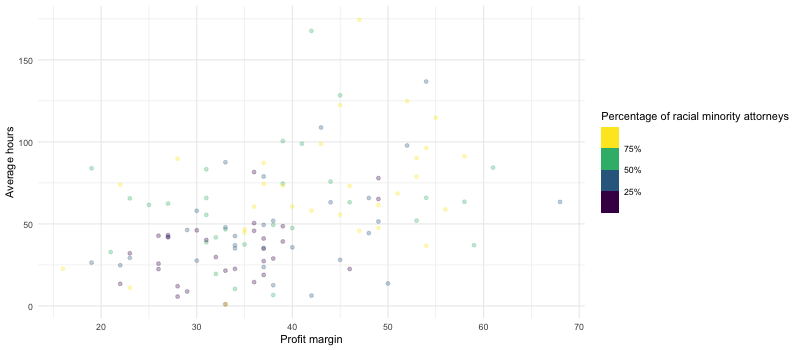

In [114]:
%%R -w 800 -h 350
library(dplyr)
library(scales)  # For pretty_breaks()


avg_hrs_quantiles <- quantile(df$avg_hrs_24, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
racial_quantiles <- quantile(df$pct_attorney_racial_24, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
profit_quantiles <- quantile(df$profit_margin_23, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)

df %>%
  ggplot() +
  aes(
      x = profit_margin_23,
      color = pct_attorney_racial_24,
      
      y = avg_hrs_24,
      ) +  
  geom_point(alpha = 0.3) +
  theme_minimal() +
  labs(x = 'Profit margin',
       y = 'Average hours',
       color = 'Percentage of racial minority attorneys') +  
  scale_color_viridis_b(breaks = racial_quantiles) 

  # ggsave('graphics/scatter_profit-margin_avg1.svg')

  

In [129]:
%%R -w 700 -h 400
library(dplyr)
library(scales)  # For pretty_breaks()


avg_hrs_quantiles <- quantile(df$avg_hrs_24, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
racial_quantiles <- quantile(df$pct_attorney_racial_24, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
profit_quantiles <- quantile(df$profit_margin_23, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)

df %>%
  ggplot() +
  aes(

      x = pct_attorney_racial_24, 
      color = profit_margin_23,
      
      y = avg_hrs_24,
      ) +  
  geom_point(alpha = 0.5) +
  theme_minimal() +
  labs(
        title = 'How racial diversity and profit margin affect pro bono work',
        x = 'Percent of attorneys who are racial minorities',
        y = 'Average hours',
        color = 'Profit margin quantile') +  
  scale_color_viridis_b(breaks = profit_quantiles) 

  ggsave('graphics/scatter_profit-margin_avg1.svg')

Saving 9.72 x 5.56 in image


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: ggrepel: 94 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



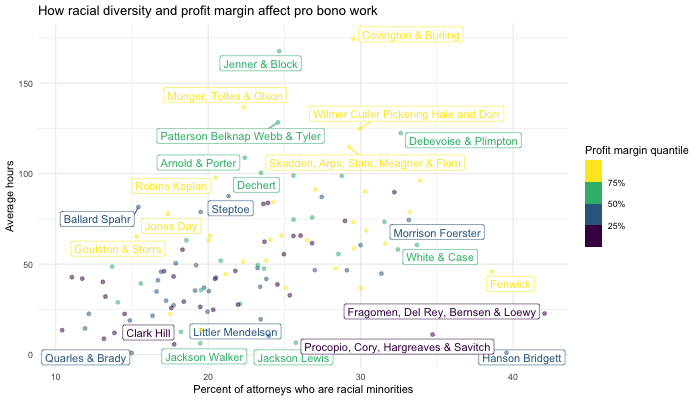

In [8]:
%%R -w 700 -h 400
library(dplyr)
library(scales)  # For pretty_breaks()


avg_hrs_quantiles <- quantile(df$avg_hrs_24, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
racial_quantiles <- quantile(df$pct_attorney_racial_24, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
profit_quantiles <- quantile(df$profit_margin_23, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)

df %>%
  ggplot() +
  aes(

      x = pct_attorney_racial_24, 
      color = profit_margin_23,
      label = firm,
      
      y = avg_hrs_24,
      ) +  
  geom_label_repel() +
  geom_point(alpha = 0.5) +
  theme_minimal() +
  labs(
        title = 'How racial diversity and profit margin affect pro bono work',
        x = 'Percent of attorneys who are racial minorities',
        y = 'Average hours',
        color = 'Profit margin quantile') +  
  scale_color_viridis_b(breaks = profit_quantiles) 